In [ ]:
from transformers import AutoProcessor
import os
import requests
from PIL import Image

import torch
from transformers import AutoProcessor, LlavaOnevisionForConditionalGeneration

model_root_dir = "/home/omote/local-share-data_ssd/huggingface_model_weights"
#model_id = os.path.join(model_root_dir, "llava-hf/llava-onevision-qwen2-7b-si-hf")
model_id = os.path.join(model_root_dir, "llava-hf/llava-onevision-qwen2-7b-ov-hf")
cache_dir = "/home/omote/local-share-data_ssd/huggingface_cache"


processor = AutoProcessor.from_pretrained(model_id, cache_dir=cache_dir)


model = LlavaOnevisionForConditionalGeneration.from_pretrained(
    model_id, cache_dir=cache_dir, torch_dtype=torch.bfloat16
).to(0)

conversation = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "What’s shown in this image?"},
        ],
    },
    {
        "role": "assistant",
        "content": [{"type": "text", "text": "This image shows a red stop sign."},]
    },
    {

        "role": "user",
        "content": [
            {"type": "text", "text": "Describe the image in more details."},
        ],
    },
]

text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

# Note that the template simply formats your prompt, you still have to tokenize it and obtain pixel values for your images
print(text_prompt)

<|im_start|>user <image>
What’s shown in this image?<|im_end|><|im_start|>assistant 
This image shows a red stop sign.<|im_end|><|im_start|>user 
Describe the image in more details.<|im_end|><|im_start|>assistant



In [2]:
processor = AutoProcessor.from_pretrained(model_id)

# Define a chat history and use `apply_chat_template` to get correctly formatted prompt
# Each value in "content" has to be a list of dicts with types ("text", "image") 
conversation = [
    {

      "role": "user",
      "content": [
          {"type": "text", "text": "What are these?"},
          {"type": "image"},
        ],
    },
]
prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

image_file = "http://images.cocodataset.org/val2017/000000039769.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)
inputs = processor(images=raw_image, text=prompt, return_tensors='pt').to(0, torch.bfloat16)
print(inputs.keys())

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(prompt)
print(processor.decode(output[0], skip_special_tokens=False))

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


dict_keys(['input_ids', 'attention_mask', 'pixel_values', 'image_sizes'])
<|im_start|>user <image>
What are these?<|im_end|><|im_start|>assistant

<|im_start|>user <image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><im

In [3]:
conversation = [
    {

      "role": "user",
      "content": [
          {"type": "image"},
          {"type": "text", "text": "What are these?"},
          {"type": "image"},
        ],
    },
]
prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
print(prompt)

<|im_start|>user <image><image>
What are these?<|im_end|><|im_start|>assistant



In [4]:
print(processor.tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=False))
print(processor.chat_template)

<|im_start|>user <image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><im

In [5]:
from datasets import load_dataset
dataset_root_dir = "/home/omote/local-share-data_ssd/huggingface_dataset"
dataset_id = os.path.join(dataset_root_dir,"jxu124/refcoco")
dataset = load_dataset(dataset_id, cache_dir=cache_dir)

image_folder_root = "/home/omote/local-share-data/mscoco2014/train2014"
train_dataset = dataset["train"]
train_sample = train_dataset[0]
for key in train_sample:
    print(key, ":", train_sample[key])

sent_ids : [0, 1, 2]
file_name : COCO_train2014_000000581857_16.jpg
ann_id : 1719310
ref_id : 0
image_id : 581857
split : train
sentences : [{'raw': 'THE LADY WITH THE BLUE SHIRT', 'sent': 'the lady with the blue shirt', 'sent_id': 0, 'tokens': ['the', 'lady', 'with', 'the', 'blue', 'shirt']}, {'raw': 'lady w back to us', 'sent': 'lady with back to us', 'sent_id': 1, 'tokens': ['lady', 'with', 'back', 'to', 'us']}, {'raw': 'blue shirt', 'sent': 'blue shirt', 'sent_id': 2, 'tokens': ['blue', 'shirt']}]
category_id : 1
raw_anns : {"segmentation": [[223.18, 477.41, 178.25, 476.84, 167.3, 468.2, 156.93, 464.16, 151.17, 464.74, 141.38, 471.65, 132.16, 476.26, 125.25, 476.26, 126.98, 451.49, 113.73, 448.61, 103.93, 439.39, 111.42, 419.81, 136.19, 373.15, 140.8, 363.36, 169.03, 352.99, 166.72, 337.43, 174.21, 301.72, 184.01, 300.57, 200.14, 299.99, 214.54, 314.39, 215.69, 332.83, 211.08, 359.32, 224.91, 372.57, 232.97, 388.13, 238.15, 420.96, 237.0, 443.43, 224.91, 452.64, 219.14, 453.22]], "

In [66]:
print(dataset["testB"][-1])

{'sent_ids': [142168, 142169, 142170], 'file_name': 'COCO_train2014_000000000154_0.jpg', 'ann_id': 590410, 'ref_id': 49987, 'image_id': 154, 'split': 'testB', 'sentences': [{'raw': 'zebra at the bottom', 'sent': 'zebra at the bottom', 'sent_id': 142168, 'tokens': ['zebra', 'at', 'the', 'bottom']}, {'raw': 'The zebra in the foreground; the first zebra.', 'sent': 'the zebra in the foreground the first zebra', 'sent_id': 142169, 'tokens': ['the', 'zebra', 'in', 'the', 'foreground', 'the', 'first', 'zebra']}, {'raw': 'the butt', 'sent': 'the butt', 'sent_id': 142170, 'tokens': ['the', 'butt']}], 'category_id': 24, 'raw_anns': '{"segmentation": [[229.5, 618.18, 235.64, 528.71, 247.91, 498.02, 259.32, 475.21, 266.33, 458.55, 269.84, 452.41, 279.49, 432.24, 295.28, 416.45, 318.08, 426.97, 332.11, 431.36, 353.16, 435.74, 361.06, 423.47, 358.43, 405.05, 352.29, 387.51, 342.64, 366.46, 338.25, 352.42, 330.36, 324.36, 320.71, 315.59, 311.94, 316.46, 301.42, 316.46, 286.51, 316.46, 268.09, 321.73,

[[299 103 477 238]]
['THE LADY WITH THE BLUE SHIRT']
[103.93, 299.99, 134.22, 177.42]
[[299 103 177 134]]


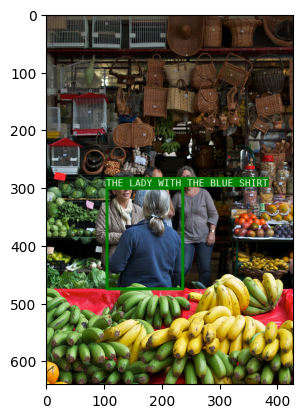

In [6]:
import matplotlib.pyplot as plt
import imgviz
import os
from PIL import Image
import numpy as np
import json

image_path = os.path.join(image_folder_root,json.loads(train_sample["raw_image_info"])["file_name"])
bboxes = np.array([train_sample["bbox"][1],train_sample["bbox"][0],train_sample["bbox"][3],train_sample["bbox"][2]]).astype(np.int32).reshape(-1, 4)
print(bboxes)
labels = [2]
captions = [train_sample["sentences"][0]["raw"]]
print(captions)
image = imgviz.instances2rgb(np.array(Image.open(image_path)), bboxes=bboxes, labels=labels,captions=captions,font_size=16)
plt.imshow(image)
raw_bboxes = json.loads(train_sample["raw_anns"])["bbox"]
print(raw_bboxes)
bboxes = np.array([raw_bboxes[1],raw_bboxes[0],raw_bboxes[3],raw_bboxes[2]]).astype(np.int32).reshape(-1, 4)
print(bboxes)

In [7]:
from torch.utils.data import Dataset

class RefCOCODataset(Dataset):
    def __init__(self, dataset, image_folder_root):
        self.dataset = dataset
        self.image_folder_root = image_folder_root

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image_path = os.path.join(self.image_folder_root,json.loads(sample["raw_image_info"])["file_name"])
        image = Image.open(image_path).convert("RGB")
        bbox = sample["bbox"]
        caption_list = [sentences["raw"] for sentences in sample["sentences"]]
        
        return image, caption_list, bbox
        

In [8]:
train_dataset = RefCOCODataset(dataset["train"], image_folder_root)

In [9]:

print(train_dataset[0])

(<PIL.Image.Image image mode=RGB size=427x640 at 0x1552C8407110>, ['THE LADY WITH THE BLUE SHIRT', 'lady w back to us', 'blue shirt'], [103.93, 299.99, 238.15, 477.40999999999997])


In [10]:
print(type(processor))
print(processor.tokenizer.chat_template)

<class 'transformers.models.llava_onevision.processing_llava_onevision.LlavaOnevisionProcessor'>
{% for message in messages %}{% if loop.first and messages[0]['role'] != 'system' %}{{ '<|im_start|>system
You are a helpful assistant.<|im_end|>
' }}{% endif %}{{'<|im_start|>' + message['role'] + '
' + message['content'] + '<|im_end|>' + '
'}}{% endfor %}{% if add_generation_prompt %}{{ '<|im_start|>assistant
' }}{% endif %}


In [67]:
image, caption_list, bbox = train_dataset[700]

processor = AutoProcessor.from_pretrained(model_id)

# Define a chat history and use `apply_chat_template` to get correctly formatted prompt
# Each value in "content" has to be a list of dicts with types ("text", "image") 
conversation = [
    {

      "role": "system",
      "content": [
          {"type": "text", "text": "You are a helpful assistant."},
        ],
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": f"Provide the bounding box coordinate of the region this sentence describes. \"{caption_list[0]}\""},
            {"type": "image"},
        ],
    }
]

prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

inputs = processor(images=image, text=prompt, return_tensors='pt').to(0, torch.bfloat16)
print(inputs)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False,temperature=0)
out_text = processor.decode(output[0], skip_special_tokens=False)
print(out_text)


/home/omote/cluster_project/iam2/.venv/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


{'input_ids': tensor([[151644,   8948,    715,  ..., 151644,  77091,    198]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[ 0.7500,  0.7031,  0.7188,  ...,  0.7266,  0.7109,  0.7266],
           [ 0.7266,  0.7969,  0.7500,  ...,  0.7812,  0.8203,  0.7344],
           [ 0.7891,  0.7969,  0.7422,  ...,  0.7422,  0.7656,  0.7500],
           ...,
           [ 0.5859,  0.6328,  0.5781,  ...,  0.8516,  0.7109,  0.7188],
           [ 0.5625,  0.6016,  0.6875,  ...,  0.8281,  0.6875,  0.7812],
           [ 0.6094,  0.6250,  0.6953,  ...,  0.7812,  0.8828,  0.8125]],

          [[ 0.6250,  0.5781,  0.5938,  ...,  0.6016,  0.5859,  0.6016],
           [ 0.6016,  0.6719,  0.6250,  ...,  0.6562,  0.6953,  0.6094],
           [ 0.6641,  0.6719,  0.6172,  ...,  0.6172,  0.6406,  0.6250],
           ...,
           [ 0.4121,  0.4355,  0.3965,  ...,  0.6250,  0.5156,  0.5312],
           [ 0.3809,  0.4277,  0.5234,  ..., 

In [62]:
import re
# test "ssssssssss[0.092,0.352,0.288,0.785][0.092,0.352,0.288,0.786]<|im_end|>"
def extract_bbox_from_text(ans):
    pattern = re.compile(r'\[(((0|1)\.(\d){3}\,){3}((0|1)\.(\d){3}))\]')
    match_list = pattern.findall(ans)

    if len(match_list) > 0:
        answer = [list(map(float,match[0].split(","))) for match in match_list]
    else:
        answer = "FAILED"
    return answer

In [63]:
print(out_text)
print(extract_bbox_from_text(out_text))

<|im_start|>system 
You are a helpful assistant.<|im_end|><|im_start|>user <image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><

[161.44, 268.11, 392.07, 501.62]
[179, 296, 389, 462]


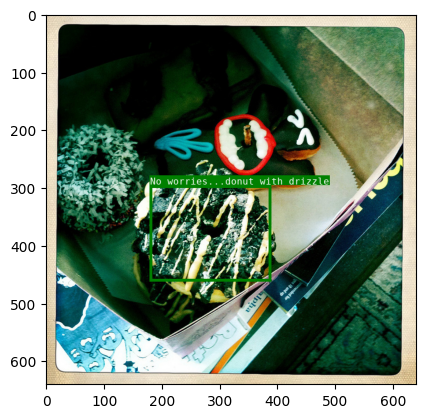

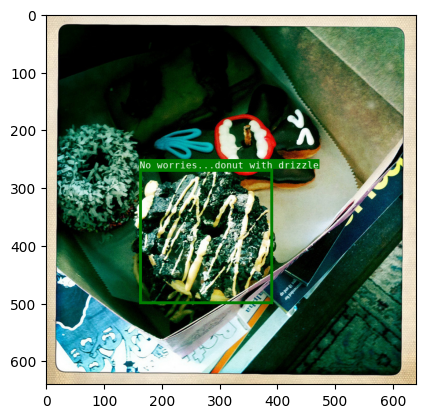

In [64]:
def visualize_bbox(image, bbox, caption):
    bboxes = np.array([bbox[1],bbox[0],bbox[3],bbox[2]]).astype(np.int32).reshape(-1, 4)
    labels = [2]
    image = imgviz.instances2rgb(np.array(image), bboxes=bboxes, labels=labels,captions=[caption],font_size=16)

    plt.imshow(image)
    plt.show()
    
width, height = image.size
model_bbox = extract_bbox_from_text(out_text)[0]
model_bbox = [int(model_bbox[0]*width),int(model_bbox[1]*height),int(model_bbox[2]*width),int(model_bbox[3]*height)]
print(bbox)
print(model_bbox)
visualize_bbox(image, model_bbox, caption_list[0])
visualize_bbox(image, bbox, caption_list[0])

In [19]:
print(bbox)

[39.33, 95.92, 327.08, 405.73]
